# Open and read data

In [1]:
sm_vp,sm_fp,sm_fn,md_vp,md_fp,md_fn,fn_create,vp_create,fp_create,total = [],[],[],[],[],[],[],[],[],[]

def ouvrir(filename):
    data = []
    with open(filename,"r",encoding = "utf-8") as f:
        g = f.readline().strip()
        data.append(g)
        while g!='':
            g = f.readline().strip()
            data.append(g)
    data = [x.split('|') for x in data]
    data.pop(-1)
    return data

def find_ner_label(data):
    return [[x[0],x[3]] for x in data]

def classifier(data):
    loc,per,org,misc = list(filter(lambda x:"LOC" in x[1].upper(),data)),list(filter(lambda x:"PER" in x[1].upper(),data)),list(filter(lambda x:"ORG" in x[1].upper(),data)),list(filter(lambda x:"MISC" in x[1].upper() or 'time' in x[1] or "prod" in x[1],data))
    return [loc,per,org,misc]




sm_vp_ner = find_ner_label(ouvrir("vp_sm.txt"))
md_vp_ner = find_ner_label(ouvrir("vp_md.txt"))
create_vp_ner = find_ner_label(ouvrir("vp_create.txt"))
total_ner = find_ner_label(ouvrir("total.txt"))

sm_class,md_class,create_class = classifier(sm_vp_ner),classifier(md_vp_ner),classifier(create_vp_ner)
sm_loc,sm_per,sm_org,sm_misc = sm_class[0],sm_class[1],sm_class[2],sm_class[3]
md_loc,md_per,md_org,md_misc = md_class[0],md_class[1],md_class[2],md_class[3]
create_loc,create_per,create_org,create_misc = create_class[0],create_class[1],create_class[2],create_class[3]

total_class = classifier(total_ner)
total_loc,total_per,total_org,total_misc = total_class[0],total_class[1],total_class[2],total_class[3]
print(len(sm_vp_ner)," ",len(md_vp_ner)," ",len(create_vp_ner)," ",len(total_ner),len(total_loc))

550   605   483   1349 648


# Visualisation

In [2]:
import matplotlib.pyplot as plt
from upsetplot import generate_counts
from upsetplot import plot
from matplotlib import pyplot

# 1. Situation Globale

### Combien d' entités nommées ont été bien trouvées par tous les 3 systèmes?

<BarContainer object of 2 artists>

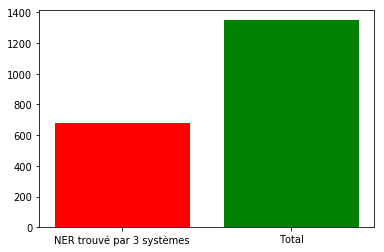

In [3]:
l1 = [x[0] for x in sm_vp_ner]
l2 = [x[0] for x in md_vp_ner]
l3 = [x[0] for x in create_vp_ner]
total = [x[0] for x in total_ner]

import collections
from collections import Counter

sm,md,create,total = Counter(l1),Counter(l2),Counter(l3),Counter(total)
trouvé = (sm | md ) | create
trouver = []
for x in trouvé:
    for y in range(trouvé[x]):
        trouver.append(x)


plt.bar(range(2),[len(trouver),len(total_ner)],color = 'rg',tick_label=["NER trouvé par 3 systèmes","Total"])

### Intersection create et sm?

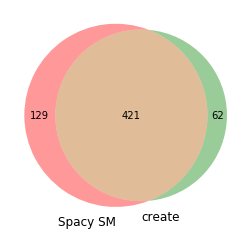

In [4]:
def Venn_d2(s1,s2,n1,n2):
    import matplotlib.pyplot as plt
    venn2([s1,s2],set_labels=([n1,n2]))
    plt.savefig("Intersection.pdf")
import collections
from collections import Counter

sm,md,create,total = Counter(l1),Counter(l2),Counter(l3),Counter(total)

import matplotlib_venn
from matplotlib_venn import venn2

venn2([sm,create],set_labels=(["Spacy SM","create"]))

### Intersection sm et md?

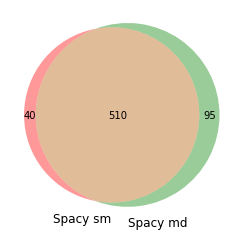

In [5]:
Venn_d2(sm,md,"Spacy sm","Spacy md")

### Intersection md et create

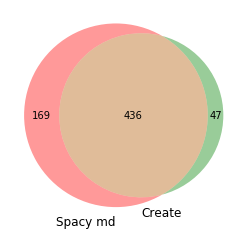

In [6]:
Venn_d2(md,create,"Spacy md","Create")

### Intersection sm + md et create

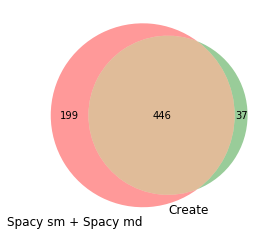

In [7]:
Venn_d2(sm | md,create,"Spacy sm + Spacy md","Create")

### Intersection sm + md + create vs total

# 2. Pour chaque étiquette

 

In [8]:
def comparer(data,total,nom,label1,label2):
    name = ["LOC","PER","ORG","MISC"]

    x =list(range(len(name)))
    sm_loc,sm_per,sm_org,sm_misc = data[0],data[1],data[2],data[3]
    total_loc,total_per,total_org,total_misc = total[0],total[1],total[2],total[3] 
    l1 = [len(sm_loc),len(sm_per),len(sm_org),len(sm_misc)]
    l2 = [len(total_loc),len(total_per),len(total_org),len(total_misc)]
    print("{} le nombre de VRAI POSITIF pour chaque étiquette".format(nom))
    f = plt.figure()
    plt.bar(x,l1,0.4,label = "{} :  Vrai positif".format(label1),fc = 'y')
    for i in range(len(name)):
        x[i] = x[i]+0.4
    plt.bar(x,l2,0.4,label = label2,tick_label = name,fc = 'r')
    plt.legend()
    plt.show()  
    f.savefig("{}.pdf".format(nom),bbox_inches='tight')

#comparer([sm_loc,sm_per,sm_org,sm_misc],[total_loc,total_per,total_org,total_misc],"Spacy sm")

### SM+train

Spacy sm le nombre de VRAI POSITIF pour chaque étiquette


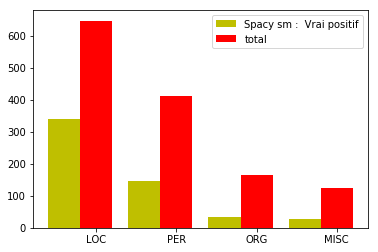

In [9]:
comparer([sm_loc,sm_per,sm_org,sm_misc],[total_loc,total_per,total_org,total_misc],"Spacy sm","Spacy sm","total")

### MD+train

Spacy md le nombre de VRAI POSITIF pour chaque étiquette


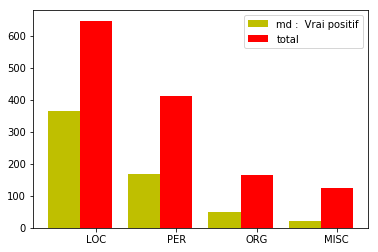

In [10]:
comparer([md_loc,md_per,md_org,md_misc],[total_loc,total_per,total_org,total_misc],"Spacy md","md","total")

### Create 

Spacy sm le nombre de VRAI POSITIF pour chaque étiquette


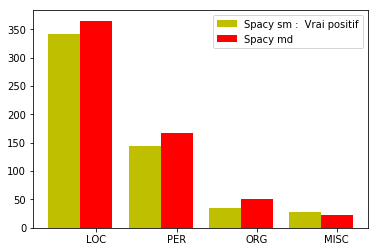

In [11]:
comparer([sm_loc,sm_per,sm_org,sm_misc],[md_loc,md_per,md_org,md_misc],"Spacy sm","Spacy sm","Spacy md")

In [ ]:
comparer([create_loc,create_per,create_org,create_misc],[total_loc,total_per,total_org,total_misc],"Create","create","total")

Amélioration sur tous les types d'entités 

Ajouter les chiffres sur le diagramme

En proportion, 

MISC, 

In [27]:
import os
os.system("mv Spacy\ sm.pdf presentation/")

0

# Pour chaque étiquette, quelle est l'intersection pour ces 3 systèmes? Spéparément, quel système est le meilleur?



In [47]:
def best(sm_org,md_org,create_org,name):
    sm_vp_org_ner = sm_org
    md_vp_org_ner = md_org
    create_vp_org_ner = create_org
    from collections import Counter
    l1,l2,l3 = sm_org,md_org,create_org

    data = [len(l1),len(l2),len(l3),intersection2(l1,l2),intersection2(l1,l3),intersection2(l2,l3),intersection3(l1,l2,l3)]
    category = subSet([],["Spacy sm","Spacy md","Create"],[])
    can1 = "Spacy sm "+name
    can2 = "Spacy md "+name
    can3 = "create "+name

    from upsetplot import from_memberships
    contents = from_memberships(category,data)
    f = plt.figure()
    plot(contents,show_counts="%d",fig=f)
    plt.suptitle("Situation of each system and intersection for {}?".format(name))
    plt.show()
    f.savefig("{}.pdf".format(name))
    
def subSet(cur,choice,res):
    for i in range(len(choice)):    
        cur.append(choice[i])
        if cur not in res:
            res.append([x for x in cur])
        subSet(cur,choice[i+1:],res)
        cur.pop(-1)
    return res

def intersection2(a,b):
    from collections import Counter
    c1,c2 = Counter(a),Counter(b)
    intersection = set(a)&set(b)
    stats = 0
    for x in intersection:
        stats += min(c1[x],c2[x])
    return stats 

def intersection3(a,b,c):
    from collections import Counter
    c1,c2,c3 = Counter(a),Counter(b),Counter(c)
    intersection = set(a)&set(b)&set(c)
    stats = 0
    for x in intersection:
        stats += min(c1[x],c2[x],c3[x])
    return stats
    
def complementary(s1,s2,name,lab1,lab2):
    intersection = s1 & s2
    sm_complementary = list(s1 - intersection)
    md_complementary = list(s2 - intersection)
    #create_complementary = list(s3 - intersection)

    data = sm_complementary + md_complementary
    category = [[lab1] for x in sm_complementary]+[[lab2] for x in md_complementary]
    from upsetplot import from_memberships
    contents = from_memberships(category,data)

    plot(contents,show_counts="%d")
    plt.suptitle("The size of complementary for {}".format(name))
    plt.show()

# ORG

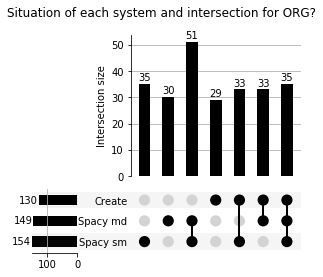

In [48]:
best([x[0] for x in sm_org],[x[0] for x in md_org],[x[0] for x in create_org],"ORG")

### Ecrire dans le rapport

### 3 points dans le rapport

### Quand l'intersection est trop grande, montrer les 2 étape par étape, [1,2,3,4] 1,2 1,3 1,4 2,4 3,4

### Complementary for ORG

### On regarde après pour le raffinement en ajoutant les entités nommées

### On a plus de faux négatifs pour tous les systèmes, on analyse en détail pour chaque sysème sur le plan de faux négatifs, si un indice est "anormal", on l'analyse par visualisation plus profonde. 

### spacy

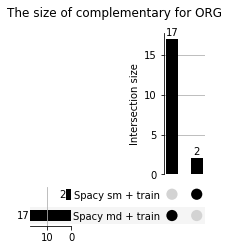

In [17]:
complementary(Counter([x[0] for x in sm_org]),Counter([x[0] for x in md_org]),"ORG","Spacy sm + train","Spacy md + train")

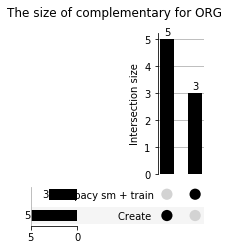

In [18]:
complementary(Counter([x[0] for x in sm_org]),Counter([x[0] for x in create_org]),"ORG","Spacy sm + train","Create ")

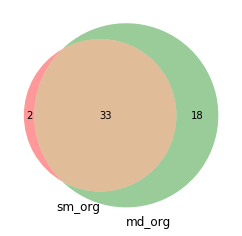

In [98]:
venn2([Counter([x[0] for x in sm_org]),Counter([x[0] for x in md_org])],set_labels=["sm_org","md_org"])

### 

# PER

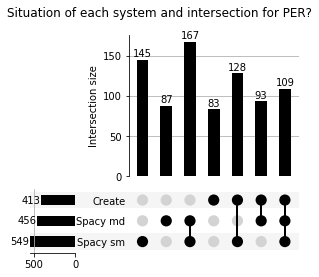

In [49]:
best([x[0] for x in sm_per],[x[0] for x in md_per],[x[0] for x in create_per],"PER")


L'intersection entre les systèmes eux-mêmes pour retrouver ce qui est commun dans les systèmes

### Référence vs (sm+md)

### vérifier la visualisation et 

### Complementary

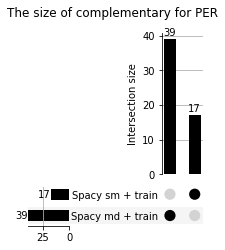

In [109]:
complementary(Counter([x[0] for x in sm_per]),Counter([x[0] for x in md_per]),"PER","Spacy sm + train","Spacy md + train")

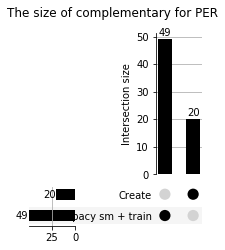

In [110]:
complementary(set([x[0] for x in sm_per]),set([x[0] for x in create_per]),"PER","Spacy sm + train","Create")

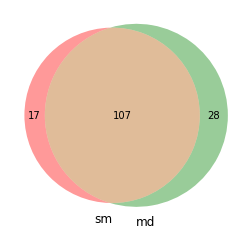

In [132]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

# LOC

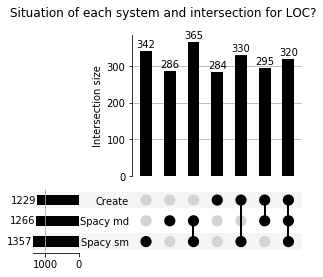

In [50]:
best([x[0] for x in sm_loc],[x[0] for x in md_loc],[x[0] for x in create_loc],"LOC")


### Complementary

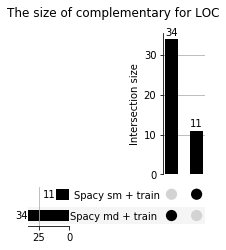

In [111]:
complementary(Counter([x[0] for x in sm_loc]),Counter([x[0] for x in md_loc]),"LOC","Spacy sm + train","Spacy md + train ")

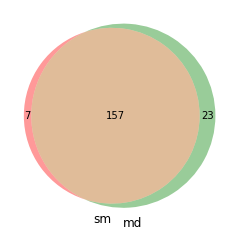

In [135]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

# MISC

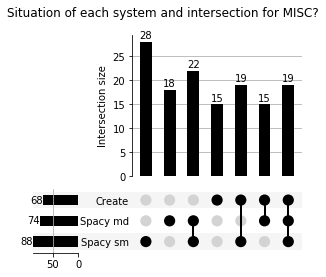

In [51]:
best([x[0] for x in sm_misc],[x[0] for x in md_misc],[x[0] for x in create_misc],"MISC")

### Complementary

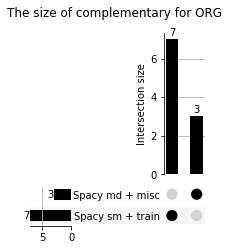

In [112]:
complementary(Counter([x[0] for x in sm_misc]),Counter([x[0] for x in md_misc]),"ORG","Spacy sm + train","Spacy md + misc")

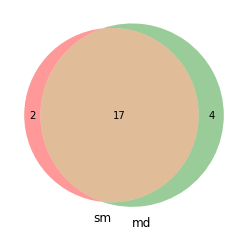

In [138]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

In [ ]:
import pandas as pd
pd.DataFrame({"Intersection":[x for x in list(set(l1) & set(l2))]})

### L'intersection est grande, montrer tous les éléments

### présenter le diagramme de Venn par citer tous les cas directement car la taille n'est pas grande...

### sm vs md

### sm vs create  md vs create

### sm + md vs total

### ajouter dans le rapport que ce n'est pas la priorité d'optimiser les paramètres...

### séparer les tâches plus détaillées. 

### le 3, 10 septembre
 
### mardi prochain répétition 3 slides 4 maximums

-- slide
-- visualisation

### jeudi : match de présentation en public

### factoriser pour faciliter les étapes en français...en anglais...

### factoriser tout le processus pour spacy, stanford....

### 1. factoriser le code ==> le corpus doit devenir une variable (ou au moins, on peut le modifier facilement)

### 2. présentation du 10 septembre ==> après la factorisation, il y a encore du temps pour la préparer après les réunions de la semaine prochaine.

### changer les chemins en chemin relatif 

### changer les chemins absolus en chemins relatifs